[1.7630000002100132e-05, 8.542000005036243e-05, 0.00025224000000889646, 0.0005535199999940233, 0.0010374000000410888, 0.0017589099999895553, 0.0027298199999677307, 0.00395394999995915, 0.00556151000000682, 0.007572270000036951]


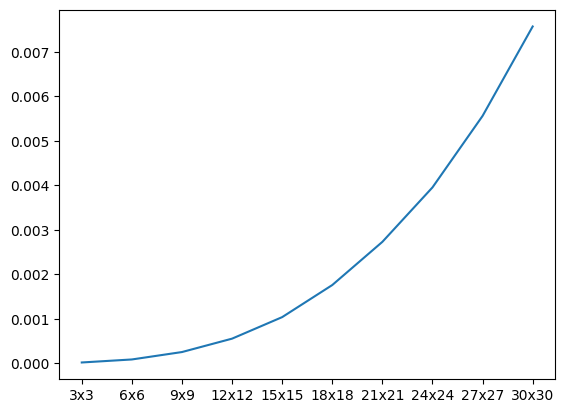

In [27]:

import numpy as np
import random 
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
def multiplicar(a:np.array,b:np.array):
    def multiplicar_listas(l1,l2):
        a_sumar=[]
        for i in range(len(l1)):
            a_sumar.append(l1[i]*l2[i])
        return sum(a_sumar)
    filas_a,columnas_a=np.shape(a)
    filas_b,columnas_b=np.shape(b)
   
    if columnas_a!=columnas_b:
        raise KeyError('las matrices no se pueden multiplicar')
    l=[]
    for x in range(filas_a):
        l.append([])
    for i in range(filas_a):  #por cada fila de a hay una columna de b SIEMPRE,sino no podríamos multiplicar las matrices
        for e in range(columnas_b):
            l[i].append(multiplicar_listas(a[i],b[:,e]))
    return np.array(l)
            

l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    l_timings.append(timings.best)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))





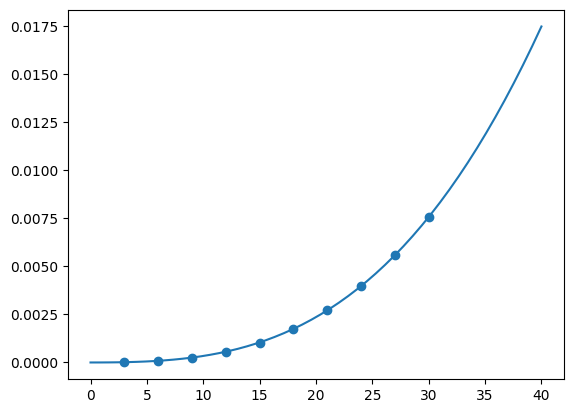

In [28]:
#para poder introducir enteros en la función polyfit, l_dims contendrá la dimensión de matrices m*n ( que siempre m=n)
l_dims=[3,6,9,12,15,18,21,24,27,30]

mymodel = np.poly1d(np.polyfit(l_dims,l_timings, 3))

myline = np.linspace(0, 40) 

#como vemos que la gráfica sigue después de los puntos definidos( el último en x=30),
#esto significa que hemos aplicado correctamente la regresión polinomial


plt.scatter(l_dims,l_timings)
plt.plot(myline, mymodel(myline))
plt.show()

1677881693.9440703
[0.0, 0.0, 0.000997781753540039, 0.0, 0.0016083717346191406, 0.0015311241149902344, 0.0029897689819335938, 0.003988504409790039, 0.005983829498291016, 0.006981372833251953]


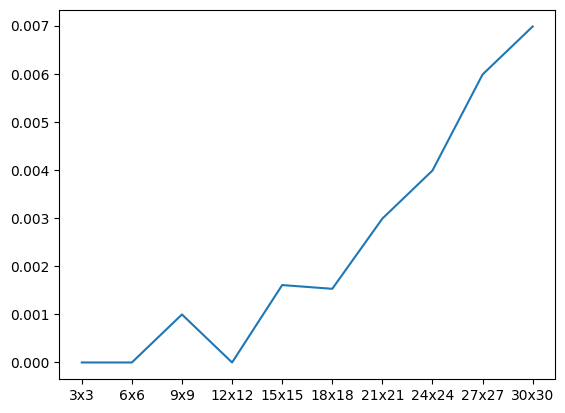

In [34]:
# midiendo tiempos tercer apartado

import time as tm
print(tm.time())
l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    #timings = %timeit -o -n 10 -r 5 -q multiplicar(m, m)
    
    inicio=tm.time()
    multiplicar(m, m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)#a continuación voy a crear una lista con las dimensiones de las distintas matrices 
#que se construyen para luego poder hacer una gráfica 
l_dims=[]
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}')  #para que nos quede una gráfica que en todas las ejecuciones sea semejante,
    #lo que hacemos es aumentar la dimensión de las matrices de 3 en 3
    
print(plt.plot(l_dims,l_timings))


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


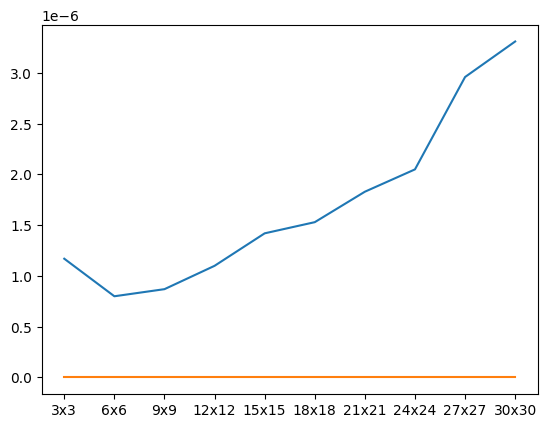

: 

In [62]:
l_dims = []
l_timings = []
for i in range(1,11):
    dim = 3*i
    l_dims.append(f'{3*i}x{3*i}')
    #m debe contener una matriz aleatoria dim x dim
    m = np.random.uniform(0,1,(dim,dim))
    timings = %timeit -o -n 10 -r 5 -q m.dot(m)
    l_timings.append(timings.best)

print(plt.plot(l_dims,l_timings))

l_dims = []
l_timings = []
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}') 
    dim = 3*i
    m = np.random.uniform(0,1,(dim,dim))
    inicio=tm.time()
    m.dot(m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)
    
print(plt.plot(l_dims,l_timings))



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


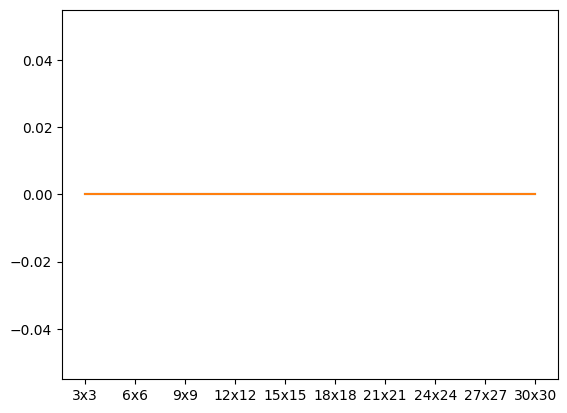

In [50]:
print(plt.plot(l_dims,l_timings))

l_dims = []
l_timings = []
for i in range(1,11):
    l_dims.append(f'{3*i}x{3*i}') 
    dim = 3*i
    m = np.random.uniform(0,1,(dim,dim))
    inicio=tm.time()
    m.dot(m)
    tiempo_ejecucion=tm.time()-inicio
    l_timings.append(tiempo_ejecucion)
    
print(l_timings)
    
print(plt.plot(l_dims,l_timings))

In [24]:
#3-A: Movimientos en Hanoi
movimientos = 0
def hanoi_moves(n, t1="t1", t2="t2", t3="t3"):

    global movimientos
    if n == 1:
        movimientos += 1
    else:
        hanoi_moves(n - 1, t1, t3, t2)
        movimientos +=1
        hanoi_moves(n - 1, t2, t1, t3)


hanoi_moves(4)
print (movimientos)


"""
Cuestiones: 
1)Funcion (n^2)-1

"""

15


'\nCuestiones: \n1)Funcion (n^2)-1\n\n'

[1.90013088285923e-07, 2.00001522898674e-07, 8.200062438845635e-07, 1.659989356994629e-06, 2.269982360303402e-06, 3.450014628469944e-06, 7.519987411797046e-06, 1.1480017565190793e-05, 2.3070001043379305e-05, 3.632998559623957e-05, 9.514999110251665e-05, 9.113999549299478e-05, 0.00015781000256538392, 0.00020125000737607478, 0.0003423300106078386, 0.0005120800109580159, 0.0003433600068092346, 0.0005309399915859103, 0.0008267700206488371, 0.001800610008649528, 0.003893529996275902, 0.004193699988536537, 0.006508369999937713, 0.01057994000148028, 0.016792119992896915]


'timings_iterativo=[]\nn_it = 0\nfor j in range(10):\n    n_it += 1\n    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)\n    timings_iterativo.append(timings.best)\n#print(timings_iterativo)'

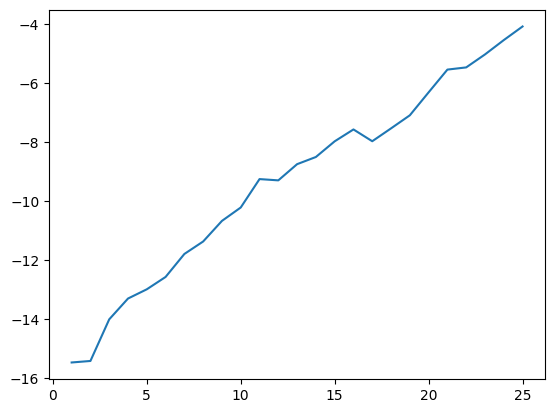

In [43]:
from matplotlib import pyplot as plt
import math
#3-B: fibonacci
def fibonacci_recursivo(n):
    if n == 0:
        return 0
    elif n == 1 or n == 2 :
        return 1
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)
    

def fibonacci_iterativo(n):
    if n == 0:
        return 0
    a = 0
    b = 1
    for h in range(n-1):
        c = a+b
        a = b
        b = c
    return c

timings_recursivo=[]
logaritmos =[]
eje_x=[]
n_rec=0
for i in range(25):
    n_rec += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_recursivo(n_rec)
    timings_recursivo.append(timings.best)
    logaritmos.append(math.log(timings.best))
    eje_x.append(n_rec)
print(timings_recursivo)
#print(plt.plot(eje_x,timings_recursivo))
print(plt.plot(eje_x,logaritmos))

"""timings_iterativo=[]
n_it = 0
for j in range(10):
    n_it += 1
    timings = %timeit -o -n 10 -r 5 -q fibonacci_iterativo(n_it)
    timings_iterativo.append(timings.best)
#print(timings_iterativo)"""


In [4]:
import numpy as np
import time

a=np.array([8,7,2,1,3,4,5,9,1,2])
print(insert_sort(a))

def insert_sort(t: np.array):
    for i in range(1, len(t)):
        j = i
        a = t[i]
        while j > 0 and t[j-1] > a:
            t[j] = t[j-1]
            j -= 1
            t[j] = a
a=np.array([8,7,2,1,3,4,5,9,1,2])

def insert_sort1(t: np.array, ini: int, fin: int):
    if ini == fin:
        return t
    elif fin<0:
        fin=len(t)+fin #por si se nos introduce un índice final negativo, lo convertimos a positivo
    

    for i in range(ini,fin):
        j = i
        a = t[i]
        while ini < j  and t[j-1] > a:
            t[j] = t[j-1]
            j -= 1
            t[j] = a
    return t
print(insert_sort1(a,0,-3))

def ave_time_insert_sort(n_permutations: int,size_ini:int,size_fin:int,step:int) -> np.array:
    for i in range(n_permutations):
        inicio=time.time()
        insert_sort()

    
            
        

[1 1 2 2 3 4 5 7 8 9]
[1 2 3 4 5 7 8 9 1 2]


TypeError: time.time() takes no arguments (1 given)

0
10
20
30
40
50
60
70
80
90
